$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

**Build a binary classifier for each digit against all the other digits at MNIST dataset.**

**1. Compute an optimal model parameter using the training dataset for each classifier $f_d(x, w)$**

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import *

#
# Load MNIST training dataset
#
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data    	= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image
im_size = size_row * size_col    # 784
num_image	= len(data)  # 60000
count   	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    line_data   = line.split(',')
    label       = int(line_data[0])   # Convert string to integer type
    im_vector   = np.asfarray(line_data[1:])
    #im_vector   = normalize(im_vector)
    
    list_label[count] = label
    list_image[:, count] = im_vector.copy()
    
    count += 1

In [73]:
A = np.empty((num_image, im_size+1), dtype=float)
b = np.empty((num_image, 1), dtype=float)

# Noise for obtaining the inverse matrix
for i in range(num_image):
    for j in range(im_size+1):
        if j == 0:
            A[i, j] = 1
        else:
            A[i, j] = list_image[j-1, i]

In [74]:
A = np.asmatrix(A)
b = np.asmatrix(b)
theta_list = np.empty((im_size+1, 10), dtype=float)
theta = np.matrix((im_size+1, 1), dtype=float)

for j in range(10):
    for i in range(num_image):
        if list_label[i] == j:
            b[i, 0] = 1
        else:
            b[i, 0] = -1
    theta = pinv(A.T*A)*A.T*b
    th = np.asfarray(theta)
    theta_list[:, j] = th[:, 0]

**2. Compute (1) true positive rate, (2) error rate using (1) training dataset and (2) testing dataset.**

In [75]:
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
test_data    	= handle_file.readlines()
handle_file.close()

size_data = len(test_data)    # 10000
count = 0   # count for the number of images

#
# make a matrix each column of which represents an images in a vector form
#
test_image  = np.empty((im_size, size_data), dtype=float)
test_label  = np.empty(size_data, dtype=int)

for line in test_data:
    test_line   = line.split(',')
    label       = int(test_line[0])   # Convert string to integer type
    test_vector   = np.asfarray(test_line[1:])
    #test_vector   = normalize(test_vector)
    
    test_label[count] = label
    test_image[:, count]    = test_vector.copy()
    
    count += 1

In [76]:
test_A = np.empty((size_data, im_size+1), dtype=float)
test_th = np.empty((im_size+1, 1), dtype=float)
accuracy = np.empty(size_data, dtype=float)
errorRate = np.empty(size_data, dtype=float)

for i in range(size_data):
    for j in range(im_size+1):
        if j == 0:
            test_A[i, j] = 1
        else:
            test_A[i, j] = test_image[j-1, i]

test_A = np.asmatrix(test_A)

In [77]:
true_positive = np.empty(size_data, dtype=float)
false_positive = np.empty(size_data, dtype=float)
true_negative = np.empty(size_data, dtype=float)
false_negative = np.empty(size_data, dtype=float)

tp_list = np.empty(10, dtype=float)
error_list = np.empty(10, dtype=float)
accuracy_list = np.empty(10, dtype=float)

def compute(label_number):
    
    test_th[:, 0] = theta_list[:, label_number]
    test_theta = np.asmatrix(test_th)
    x = test_theta
    #test_b = np.matrix((size_data, 1), dtype=float)
    test_b = test_A * x

    label_cnt = 0  # answer positive count
    nlabel_cnt = 0  # answer negative count 
    tp = 0    # true positive count
    fp = 0    # false positive count
    tn = 0    # true negative count
    fn = 0    # false negative count

    for i in range(size_data):
        if test_label[i] == label_number:
            if test_b[i, 0] > 0:
                tp += 1
            else:
                fn += 1
            label_cnt += 1
        else:
            if test_b[i, 0] <= 0:
                tn += 1
            else:
                fp += 1
            nlabel_cnt += 1
        
        if label_cnt != 0:
            true_positive[label_cnt] = (tp / label_cnt) * 100
            false_negative[label_cnt] = (fn / label_cnt) * 100
 
        if nlabel_cnt != 0:
            false_positive[nlabel_cnt] = (fp / nlabel_cnt) * 100
            true_negative[nlabel_cnt] = (tn / nlabel_cnt) * 100

        # testing accuracy
        accuracy[i] = (tp + tn) / (label_cnt + nlabel_cnt) * 100

        # error rate
        errorRate[i] = (fn + fp) / (label_cnt + nlabel_cnt) * 100
    
    tp_list[label_number] = true_positive[label_cnt]

    error_list[label_number] = errorRate[size_data-1]
    accuracy_list[label_number] = accuracy[size_data-1]
    
    return(label_cnt)

**[True Positive Rate / Error Rate]**

**$Total\ Label$**

In [89]:
total_tp = 0
total_accuracy = 0
total_error = 0

for i in range(10):
    total_tp += tp_list[i]
    total_error += error_list[i]
    total_accuracy += accuracy_list[i]

total_tp = total_tp / 10
total_accuracy = total_accuracy / 10
total_error = total_error / 10

print('Total True Positive : ', total_tp, '%')
print()
print('Total Accuracy      : ', total_accuracy, '%')
print('Total Error Rate    : ', total_error, '%')

Total True Positive :  68.20837828369676 %

Total Accuracy      :  96.34799999999998 %
Total Error Rate    :  3.652 %


**$Label = 0$**

Accuracy Rate :  98.42999999999999 %
Error Rate    :  1.5699999999999998 %

True Positive  :  88.36734693877551 %
false_negative :  11.63265306122449 %
true_negative  :  99.52328159645234 %
false_positive :  0.47671840354767187 %



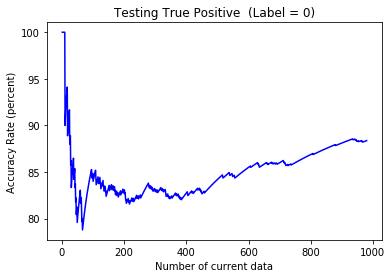

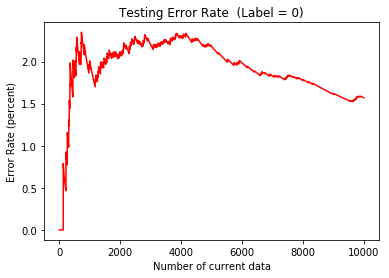

In [79]:
labelCount = compute(0)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 0)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 0)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 1$**

Accuracy Rate :  98.34 %
Error Rate    :  1.66 %

True Positive  :  91.18942731277532 %
false_negative :  8.81057268722467 %
true_negative  :  99.25549915397632 %
false_positive :  0.7445008460236886 %



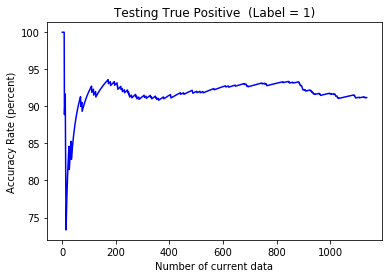

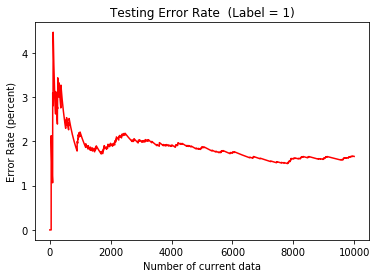

In [80]:
labelCount = compute(1)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 1)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 1)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 2$**

Accuracy Rate :  95.84 %
Error Rate    :  4.16 %

True Positive  :  62.4031007751938 %
false_negative :  37.5968992248062 %
true_negative  :  99.68777876895629 %
false_positive :  0.31222123104371097 %



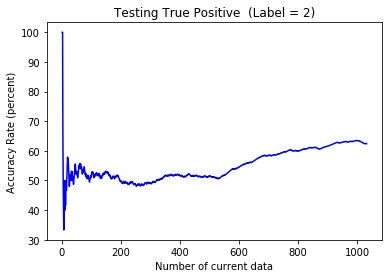

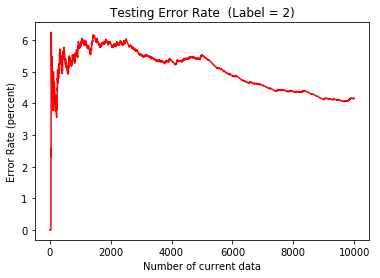

In [90]:
labelCount = compute(2)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 2)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 2)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 3$**

Accuracy Rate :  96.02000000000001 %
Error Rate    :  3.9800000000000004 %

True Positive  :  64.85148514851485 %
false_negative :  35.148514851485146 %
true_negative  :  99.52169076751946 %
false_positive :  0.4783092324805339 %



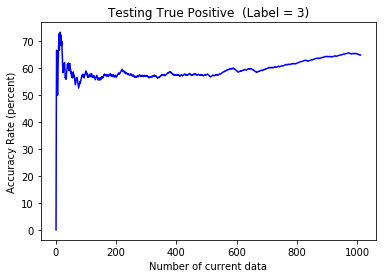

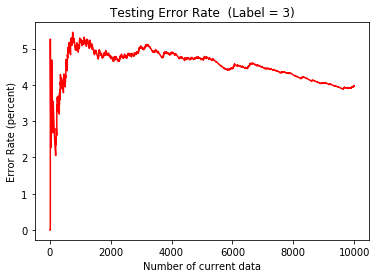

In [82]:
labelCount = compute(3)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 3)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 3)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 4$**

Accuracy Rate :  96.65 %
Error Rate    :  3.35 %

True Positive  :  69.75560081466395 %
false_negative :  30.24439918533605 %
true_negative  :  99.57862053670436 %
false_positive :  0.421379463295631 %



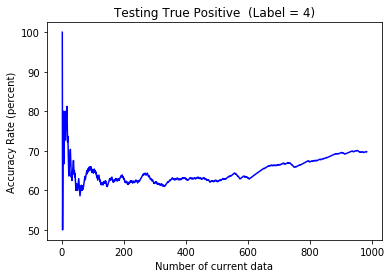

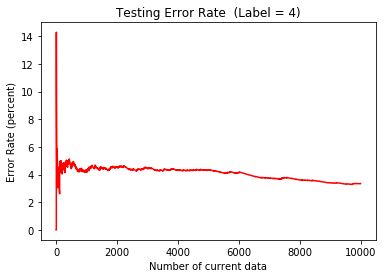

In [83]:
labelCount = compute(4)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 4)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 4)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 5$**

Accuracy Rate :  94.64 %
Error Rate    :  5.36 %

True Positive  :  46.18834080717489 %
false_negative :  53.81165919282511 %
true_negative  :  99.38515590689504 %
false_positive :  0.6148440931049627 %



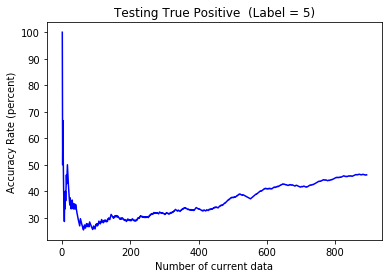

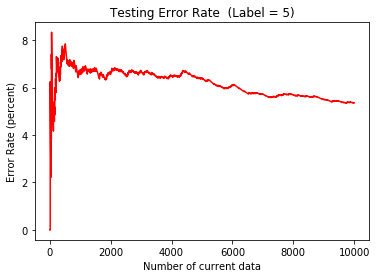

In [84]:
labelCount = compute(5)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 5)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 5)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 6$**

Accuracy Rate :  97.39999999999999 %
Error Rate    :  2.6 %

True Positive  :  80.58455114822547 %
false_negative :  19.41544885177453 %
true_negative  :  99.18159699181597 %
false_positive :  0.81840300818403 %



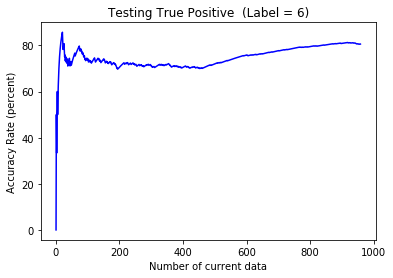

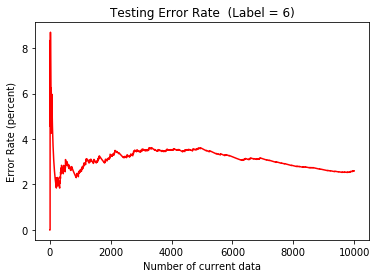

In [85]:
labelCount = compute(6)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 6)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 6)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 7$**

Accuracy Rate :  96.46000000000001 %
Error Rate    :  3.54 %

True Positive  :  71.49805447470817 %
false_negative :  28.501945525291827 %
true_negative  :  99.32010699955417 %
false_positive :  0.6798930004458315 %



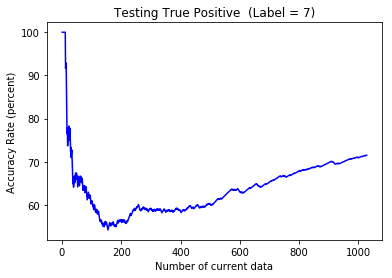

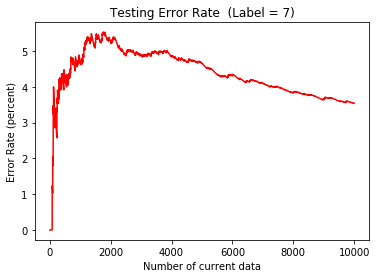

In [86]:
labelCount = compute(7)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 7)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 7)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 8$**

Accuracy Rate :  94.89999999999999 %
Error Rate    :  5.1 %

True Positive  :  51.74537987679672 %
false_negative :  48.25462012320328 %
true_negative  :  99.55683580766674 %
false_positive :  0.44316419233325943 %



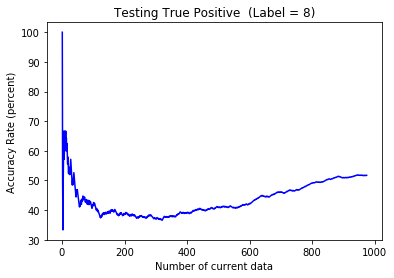

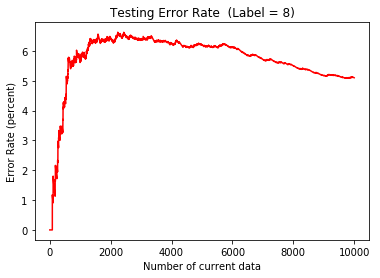

In [87]:
labelCount = compute(8)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 8)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 8)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()

**$Label = 9$**

Accuracy Rate :  94.8 %
Error Rate    :  5.2 %

True Positive  :  55.50049554013875 %
false_negative :  44.49950445986125 %
true_negative  :  99.21032143254365 %
false_positive :  0.7896785674563452 %



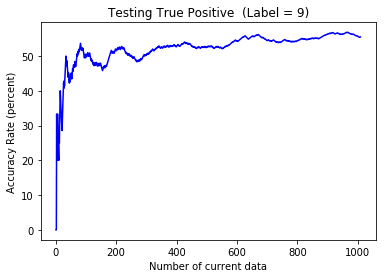

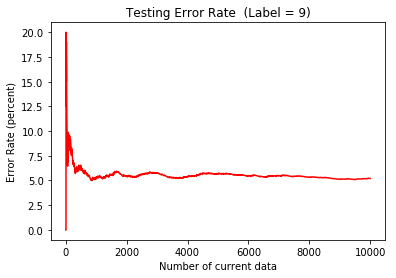

In [88]:
labelCount = compute(9)

print("Accuracy Rate : ", (accuracy[size_data-1]), '%')
print("Error Rate    : ", (errorRate[size_data-1]), '%')
print()
print("True Positive  : ", (true_positive[labelCount]), '%')
print("false_negative : ", (false_negative[labelCount]), '%')
print("true_negative  : ", (true_negative[size_data - labelCount]), '%')
print("false_positive : ", (false_positive[size_data - labelCount]), '%')
print()

x = range(1, labelCount+1)
y = true_positive[x]
plt.plot(x, y, "BLUE")
plt.title('Testing True Positive  (Label = 9)')
plt.xlabel('Number of current data')
plt.ylabel('Accuracy Rate (percent)')
plt.show()

x = range(size_data)
y = errorRate[x]
plt.plot(x, y, "RED")
plt.title('Testing Error Rate  (Label = 9)')
plt.xlabel('Number of current data')
plt.ylabel('Error Rate (percent)')
plt.show()